In [15]:
# You may add additional imports here
%matplotlib
%matplotlib inline
from PIL import Image
from IPython.display import display
import random
import matplotlib.pyplot as plt
import csv
import numpy

Using matplotlib backend: TkAgg


Question 1
==========

All parts of Question 1 use the _point-a-rally (PARS) scoring_ system.

**Question 1a:** Complete the following function so that it implements the PARS algorithm from the coursework specification.

**[Functionality: 7 marks]**

In [16]:
def game(ra, rb):
    #probability of player a winning 
    prob = ra / (ra+rb)
    #score a and score b
    sa = 0
    sb = 0
    pars_rally = 0

    while  (sa < 11 and sb < 11) or abs(sa - sb) < 2:
        
       #getting a random floating point and comparing
       #to prob so that we can determine who won
       
       if random.random() < prob:
           sa = sa + 1
           pars_rally = pars_rally + 1
       else:
           sb = sb + 1
           pars_rally = pars_rally + 1
    return sa, sb


**Testing:** If the random seed is set to 57, then calling the function with arguments `70` and `30` should return `(11,5)`.

In [17]:
random.seed(57)
print(game(70, 30))

(11, 5)


**Question 1b:** Complete the following function `win_probability_game(ra, rb, simulations)` to simulate `simulations` games in order to estimate the probability that a player with ability `ra` will win a game against a player of ability `rb`.

**[Functionality: 4 marks]**

In [18]:
def win_probability_game(ra, rb, simulations):
    #initialising the win counter  
    awins = 0
    #loops for the size of simulations
    for _ in range(simulations):
        #calling game function with the player ratings
        #and returns score to sa and sb
        sa, sb = game(ra,rb)
        #sa = game(ra)
        #sb = game(rb)
        #if sa is larger sa has won the game
        if sa > sb:  
            #increments total times a has won           
             awins = awins + 1
     #returns calculation of probability that a wins 
    return awins/simulations
    

**Testing:** Given sufficient simulations, calling the function with abilities `70` and `30` should give the answer `0.98` when printed to 2 decimal places.

In [19]:
# Print win_probability_game(70, 30) to 2 decimal places for a suitable value of n:
print(round(win_probability_game(70, 30, 1000), 2))

0.98


**Question 1c:** Assume players abilities are given in a csv file with the format:
```
player a ability, player b ability,
60, 20,
100, 55,
50, 40,
20, 70,
95, 85,
```
Complete the following function to read in a specified csv file of this format and return a `list` of `tuple`s containing each pair of abilities.

**[Functionality: 4 marks]**

In [20]:
def read_abilities(filename): 
    #empty list for the tuples to be put into
    result = []
    #opens file in r mode (read mode)
    with open(filename, "r") as csvfile:
        csv_reader = csv.reader(csvfile)
        #used to skip first row(which is the header)
        next(csv_reader)
        #iterates ove the rows in the file and stores
        #them in the result list together
        for row in csv_reader:
            playerARating = int(row[0])
            playerBRating = int(row[1])
            result.append((playerARating, playerBRating))
            
        #print(result)
        return result

**Testing:** Calling the function to read the file `test.csv` from Learning Central should return `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]`

In [21]:
filename = "test.csv"
read_abilities(filename)


[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]

**Question 1d:** Write a function that takes a `list` of the format returned by your answer to 1c as an argument, and uses `matplotlib` to produce a plot (with labelled axes) showing the probability that player a beats player b (in a game) against `ra / r_b` for each pair.

**[Functionality: 5 marks]**

In [22]:
def plot_win_probabilities(ratios):  
    ratioVal = []
    winProbabilities = []

    for ratio in ratios:
        # unpack ratio tuple into ra and rb
        ra, rb = ratio  

        # Calculating player ability and storing
        ratioVal.append(ra / rb)

        # Calculatin win prob and append to list
        win_prob = win_probability_game(ra, rb, 10000)
        winProbabilities.append(win_prob)

    
    plt.plot(ratioVal, winProbabilities, "ro")  
    plt.xlabel("ra/rb")  
    plt.ylabel("player a win probability") 
    plt.savefig("csvfig.svg") 

**Testing:** The following figure (or similar) should result from the data `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]'

<img src="./win_probabilities.png" alt="Win probabilities" width="500">


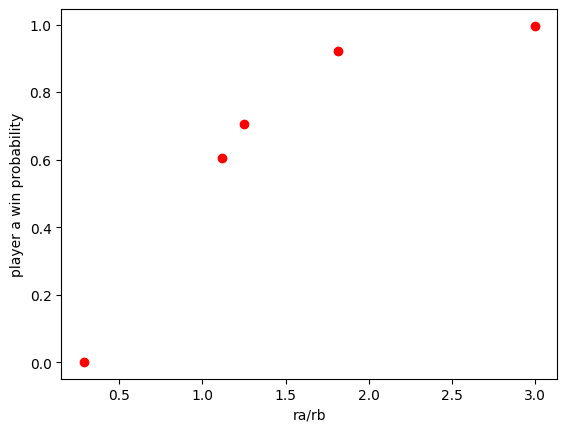

In [23]:
filename = "test.csv"
ratios = read_abilities(filename)
plot_win_probabilities(ratios)

**Question 1e:** Complete the following function `win_probability_match(ra, rb, simulations, m)` to simulate `simulations` matches which are won by the first player to win `m` games, and returns an estimate of the probability that a player with ability `ra` will win such a match against a player of ability `rb`.

Provide code that works out the smallest value of `m` such that `win_probability_match(60, 40, simulations, m)` is at least `0.9`. 

_HINT: make sure you use an appropriate value for `simulations`._

**[Functionality: 5 marks]**

In [24]:
def win_probability_match(ra, rb, simulations, m): # you win be winning m games
    #initialising agame wins and b game wins
    #while loop for running game function to add to match 
    wins = 0
    for _ in range(simulations):
        sa = 0
        sb = 0
        while sa < m and sb < m:
            result = game(ra, rb)
            if result[0] > result[1]:
                sa += 1
            else:
                sb += 1
        if sa == m:
            wins += 1
    return wins / simulations

# Calculate lowest value of m here
# defining m is 1 
#   while recurring function as being m is less than 0.9
#   increment m by 1 
# return m outside of while loop 
ra = 60
rb = 40
simulations = 10000  
m = 1
while True:
    win_prob = win_probability_match(ra, rb, simulations, m)
    if win_prob >= 0.9:
        break
    m += 1

print(f"{m}")

2


Question 2
==========

Complete the remaining template of a scientific report that uses the results of simulation (with suitable input data) to investigate whether English or PARS is the ``better'' scoring method for squash matches. 

You should clearly state any assumptions you make, and may add any number of code cells. Guidance for completing the markdown/text cells is given in the coursework specification. The word count of the remaining markdown/text cells must be at most 750.

Your investigation should consider the relative ability of the two players (i.e. `ra/rb`) as the _independent variable_ and include appropriate figures that show how your choice of relevant _dependent variable_ varies. Your results **must** cover at least 50 different values of `ra/rb`.

Some starting points you may consider:
- How _fair_ is the scoring method - does the better player usually win?
- Shorter matches are usually preferable (e.g. for television) - if you assume each rally in a match takes equal time, how long do matches typically last?
- What effect does the relative ability of the two players have?

**[Report: 7 marks; Achievement: 8 marks]**

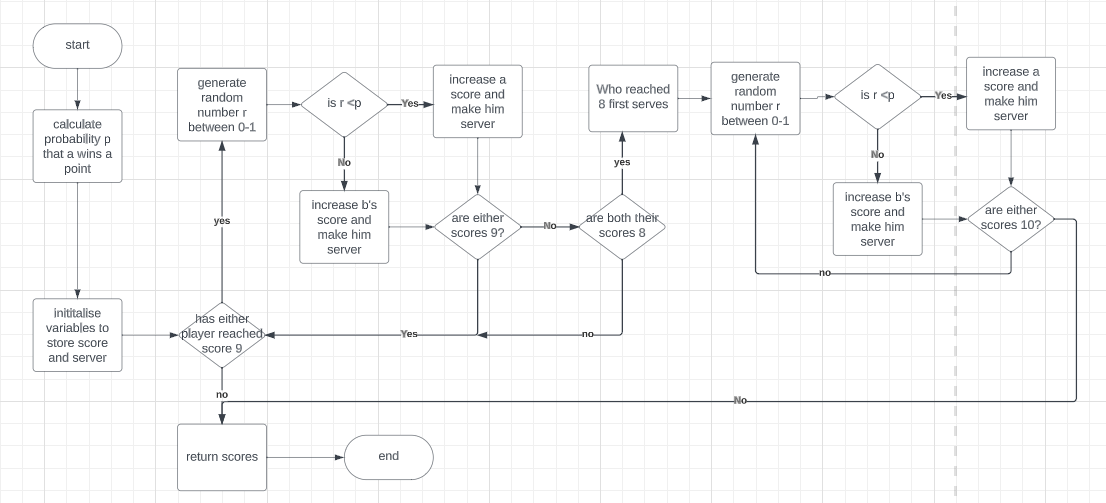

In [25]:
img = Image.open('dfd.png')
display(img)

## Problem


The project is attempting to investigate the differences between the two different rules systems in squash, English or pars. To determine which is ultimately best to be televised, I will be investigating the length of games on average to see which will be better on television. I will also be investigating the fairness of the two, as well as how close the games can be, since if the games are ending with close scores, the games will be more engaging leading to better entertainment for the crowd. 

## Method

To allow me to investigate the efficiency of games within the two different scoring methods, I will be creating some code that is able to carry out many simulations that re-enact the two different games, allowing me to then carry out mean calculations to see on average how long games are based on the varying ability of the players. 

In [26]:
def game(ra, rb):
    #probability of player a winning 
    prob = ra / (ra+rb)
    #score a and score b
    sa = 0
    sb = 0
    pars_rally = 0

    while  (sa < 11 and sb < 11) or abs(sa - sb) < 2:
        
       #getting a random floating point and comparing
       #to prob so that we can determine who won
       
       if random.random() < prob:
           sa = sa + 1
           pars_rally = pars_rally + 1
       else:
           sb = sb + 1
           pars_rally = pars_rally + 1
    return sa, sb, pars_rally

Firstly, I had to create a function that carries out the PARS version of squash, and then I got it to return the values of the scores as well and the quantity of rallies were carried out throughout the entirety of the game. This has been done by simulating the game by using the skill level of the two players to calculate the probability of a win, all whilst keeping track of how many games were played to use for the problem we are trying to figure out. The same is being done with the English game, however with the added complexities of the game such as going to 9 points, and if both players reach 8 then a decision is made to either go to 9 or 10 points. 

In [27]:
def english_game(ra,rb):
    prob = ra / (ra+rb)
    sa = 0
    sb = 0
    a_serving = random.randint(0,1)
    english_rally = 0 
    nine_or_ten = None
    
    while (sa < 9 and sb < 9):
        if a_serving == 0:
            if random.random() < prob:
                sa = sa + 1
                english_rally = english_rally + 1
            else:
                a_serving = 1
                english_rally = english_rally + 1
        else:
            if random.random() < prob:
                a_serving = 0
                english_rally = english_rally + 1
            else:
                sb = sb + 1
                english_rally = english_rally + 1

        if(sa == 8 and sb == 8 and nine_or_ten is None):
            nine_or_ten = random.randint(0,1)
            if nine_or_ten == 0:
                pass
            else:
                while(sa < 10 and sb < 10):
                    if a_serving == 0:
                        if random.random() < prob:
                            sa = sa + 1
                            english_rally = english_rally + 1
                        else:
                            a_serving = 1
                            english_rally = english_rally + 1
                    else:
                        if random.random() < prob:
                            a_serving = 0
                            english_rally = english_rally + 1
                        else:
                            sb = sb + 1
                            english_rally = english_rally + 1
            

        

    return sa,sb, english_rally


print(english_game(50,50))

(9, 5, 23)


Then to run the simulations, I used the ‘run_games’ function as seen in results, to use both of the previous functions within to calculate the mean total of games for every game over a series of simulations, whilst over each simulation raising the skill level of player a to also demonstrate how the player abilities can affect the number of games played.  I did this by running the simulations over and over again, and over each iteration the player ability of player a would raise by 1, till it ultimately reaches max skill level. Then I took in the total games and put it into a list where a mean would be found, and later on will be reflected onto a scatter graph. 

## Assumptions

1. The English scoring method going to 9 or 10: 

The player that got to 8 first gets the chance to decide whether or not the game will go to 9 or 10 in case of a tie. 

2. Probability determines the outcome: 

The probability, which is based off of the players' ability is the main factor which determines which player will win the majority of the rounds. 

3. Skill level is accurately demonstrated: 

The use of ‘ar’ and ‘rb’ will be able to accurately convey the skill level and difference between the two players. 

4. Each rally is independent:  

No matter what occurred during the previous matches should affect the current round, so say a player with 30/50 odds of winning should still have the same odds no matter if they are on a losing streak. 

5. Player b’s performance is consistent throughout the games: 

To measure the difference of lengths of games, we require b to remain the same throughout to measure the length of a game with people who are not on the same skill level and people who are. 

## Results

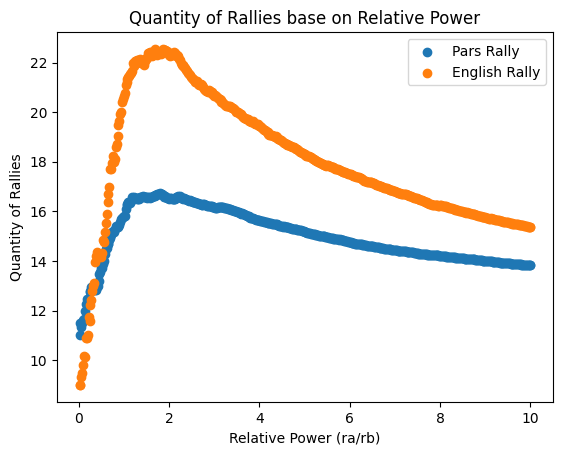

In [28]:
def run_games(initial_ra,rb,simulations, ra_increment):
    total_pars_rallies = 0
    total_english_rallies = 0
    mean_pars_rallies = []
    mean_english_rallies = []
    relative_power  = []

    ra = initial_ra

    
    for i in range(simulations):

        prob = ra / (ra+rb)
    
        sa = 0
        sb = 0
        #pars_rally = 0

        esa = 0
        esb = 0
        #english_rally = 0 
        
        a_serving = random.randint(0,1)
        nine_or_ten = None


        while  (sa < 11 and sb < 11) or abs(sa - sb) < 2:
        #getting a random floating point and comparing
        #to prob so that we can determine who won
            if random.random() < prob:
                sa = sa + 1
            else:
                sb = sb + 1
            #pars_rally = pars_rally + 1
            total_pars_rallies = total_pars_rallies + 1
                
        #pars_rallies.append(pars_rally)
    
        while (esa < 9 and esb < 9):
            if a_serving == 0:
                if random.random() < prob:
                    esa = esa + 1
                else:
                    a_serving = 1
            else:
                if random.random() < prob:
                    a_serving = 0
                else:
                    esb = esb + 1
            #english_rally = english_rally + 1
            total_english_rallies = total_english_rallies + 1

            if(esa == 8 and esb == 8 and nine_or_ten is None):
                nine_or_ten = random.randint(0,1)
                if nine_or_ten == 0:
                    pass
                else:
                    while(esa < 10 and esb < 10):
                        if a_serving == 0:
                            if random.random() < prob:
                                esa = esa + 1
                            else:
                                a_serving = 1
                        else:
                            if random.random() < prob:
                                a_serving = 0
                            else:
                                esb = esb + 1
                        #english_rally = english_rally + 1
                        total_english_rallies = total_english_rallies + 1
        #english_rallies.append(english_rally)
        mean_pars_rallies.append(total_pars_rallies / (i + 1))
        mean_english_rallies.append(total_english_rallies / (i + 1))
        relative_power.append(ra/rb)
        ra += ra_increment
    
    
        #mean_pars_rallies = pars_rallies / simulations
        #mean_english_rallies = english_rallies / simulations
        
    plt.scatter(relative_power, mean_pars_rallies, label='Pars Rally')
    plt.scatter(relative_power, mean_english_rallies, label='English Rally')
    plt.xlabel("Relative Power (ra/rb)")
    plt.ylabel("Quantity of Rallies")
    plt.title("Quantity of Rallies base on Relative Power")
    plt.legend()
    plt.savefig("rally_graph.svg")
    plt.show()
    




run_games(1,50,500, 1)         
    
    
        



The graph generated from the simulations has shown us that pars often have longer game times when the players have a similar skill level, however as the skill gap grows, the games end up being a lot faster paced. Whereas with the English games, there is a steadier decline no matter the player skill level. Showing us that as the skill level grows the number of rallies per game increases drastically. 

## Conclusions

The graph created by the simulations have shown that the PARS system in squash usually results in faster games as the gap between the player ability grows, which leads it to be a lot more easily televised in comparison to the English system, which keeps having longer games even with a larger skill gap between players. This shows us that for the use of games needing to be televised, the PARS system is optimal and better suited for this use case, however if in any other situation where people may want longer games, the English rule system would be better suited for those situations. 